In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Boston_Housing.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df['CRIM'].fillna(df['CRIM'].mean(),inplace=True)
df['ZN'].fillna(df['ZN'].mean(),inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(),inplace=True)
df['CHAS'].fillna(df['CHAS'].mean(),inplace=True)
df['AGE'].fillna(df['AGE'].mean(),inplace=True)
df['LSTAT'].fillna(df['LSTAT'].mean(),inplace=True)

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
X = df.loc[:,df.columns != 'MEDV']
y = df.loc[:,df.columns == 'MEDV']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [9]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit(X_train)
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(128,input_shape=(13,),activation='relu',name='dense1'))
model.add(Dense(64,activation='relu',name='dense2'))
model.add(Dense(1,activation='linear',name='output_layer'))
model.compile(optimizer='adam',loss='mse',metrics='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 128)               1792      
                                                                 
 dense2 (Dense)              (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history = model.fit(X_train,y_train,epochs=100, validation_split=0.05,verbose=1)

Epoch 1/100
11/11 [==============================] - 2s 54ms/step - loss: 570.3309 - mae: 21.9600 - val_loss: 581.5074 - val_mae: 22.1038
Epoch 2/100
11/11 [==============================] - 0s 14ms/step - loss: 518.6302 - mae: 20.6712 - val_loss: 518.4640 - val_mae: 20.5597
Epoch 3/100
11/11 [==============================] - 0s 12ms/step - loss: 442.1245 - mae: 18.6197 - val_loss: 421.6966 - val_mae: 17.9048
Epoch 4/100
11/11 [==============================] - 0s 13ms/step - loss: 335.4203 - mae: 15.4001 - val_loss: 296.3676 - val_mae: 13.9923
Epoch 5/100
11/11 [==============================] - 0s 13ms/step - loss: 222.4467 - mae: 11.8987 - val_loss: 184.9159 - val_mae: 9.8143
Epoch 6/100
11/11 [==============================] - 0s 13ms/step - loss: 155.3612 - mae: 9.8303 - val_loss: 138.3818 - val_mae: 8.6328
Epoch 7/100
11/11 [==============================] - 0s 13ms/step - loss: 136.3897 - mae: 9.2043 - val_loss: 123.8467 - val_mae: 8.2486
Epoch 8/100
11/11 [====================

11/11 [==============================] - 0s 12ms/step - loss: 15.9406 - mae: 2.6825 - val_loss: 29.5204 - val_mae: 3.6677
Epoch 62/100
11/11 [==============================] - 0s 13ms/step - loss: 15.9802 - mae: 2.7536 - val_loss: 29.8689 - val_mae: 3.6492
Epoch 63/100
11/11 [==============================] - 0s 13ms/step - loss: 15.7213 - mae: 2.6861 - val_loss: 30.7205 - val_mae: 3.6775
Epoch 64/100
11/11 [==============================] - 0s 12ms/step - loss: 15.7416 - mae: 2.6768 - val_loss: 28.1643 - val_mae: 3.5790
Epoch 65/100
11/11 [==============================] - 0s 13ms/step - loss: 15.5419 - mae: 2.7079 - val_loss: 30.4368 - val_mae: 3.6355
Epoch 66/100
11/11 [==============================] - 0s 15ms/step - loss: 15.7642 - mae: 2.7211 - val_loss: 30.0877 - val_mae: 3.6121
Epoch 67/100
11/11 [==============================] - 0s 12ms/step - loss: 15.6502 - mae: 2.6889 - val_loss: 28.0605 - val_mae: 3.5164
Epoch 68/100
11/11 [==============================] - 0s 12ms/step -

In [12]:
mse,mae = model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 23.6686 - mae: 3.1895


In [13]:
print(mse)

23.668636322021484


In [14]:
print(mae)

3.1894540786743164


In [15]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


<Axes: xlabel='MEDV'>

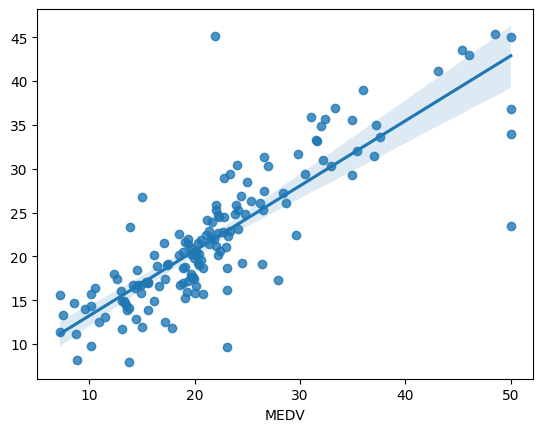

In [16]:
sns.regplot(x=y_test,y=y_pred)